In [68]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.metrics import silhouette_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import dmba

# University Rankings

In [11]:
uni_df= dmba.load_data('Universities.csv')
uni_df = uni_df.set_index('College Name')
uni_df[uni_df.columns.values[2:]] = uni_df[uni_df.columns.values[2:]].apply(lambda x: x.astype(float))
uni_df

,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
College Name,,,,,,,,,,,,,,,,,,,
Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Virginia State College,WV,1,1869.0,NaN,957.0,NaN,NaN,2817.0,1939.0,1988.0,4616.0,1500.0,1700.0,50.0,750.0,750.0,38.0,19.2,NaN
West Virginia University,WV,1,9630.0,7801.0,2881.0,23.0,49.0,14524.0,1053.0,2128.0,6370.0,2284.0,2026.0,NaN,NaN,NaN,83.0,13.4,57.0
West Virginia Wesleyan College,WV,2,1566.0,1400.0,483.0,28.0,55.0,1509.0,170.0,14200.0,14200.0,1750.0,2025.0,NaN,450.0,1100.0,58.0,16.4,67.0


## Data Cleaning

In [12]:
harvard = uni_df.loc['Harvard University']
uni_df = uni_df.dropna(axis=0, how='any')
uni_df

,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
College Name,,,,,,,,,,,,,,,,,,,
Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
Birmingham-Southern College,AL,2,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,11660.0,11660.0,2050.0,2430.0,120.0,400.0,900.0,74.0,14.0,72.0
Huntingdon College,AL,2,608.0,520.0,127.0,26.0,47.0,538.0,126.0,8080.0,8080.0,1380.0,2540.0,100.0,500.0,1100.0,63.0,11.4,44.0
Talladega College,AL,2,4414.0,1500.0,335.0,30.0,60.0,908.0,119.0,5666.0,5666.0,1424.0,1540.0,418.0,1000.0,1400.0,56.0,15.5,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Univ. of Wisconsin at Eau Claire,WI,1,5729.0,4520.0,1957.0,20.0,52.0,8516.0,1264.0,2208.0,6996.0,1565.0,1140.0,1070.0,279.0,1260.0,80.0,19.3,61.0
Wisconsin Lutheran College,WI,2,152.0,128.0,75.0,17.0,41.0,282.0,22.0,9100.0,9100.0,1800.0,1900.0,90.0,500.0,1400.0,48.0,8.5,50.0
Alderson-Broaddus College,WV,2,582.0,498.0,172.0,21.0,44.0,799.0,78.0,10468.0,10468.0,1574.0,1806.0,92.0,660.0,1800.0,40.0,11.5,52.0


## Hierarchical Clustering

In [13]:
cont_list = ['% new stud. from top 10%', '% new stud. from top 25%']
cont_list.extend(list(uni_df.columns[10:]) )

uni_df_norm = uni_df[cont_list]
uni_df_norm[cont_list] = StandardScaler().fit_transform(uni_df_norm)
uni_df_norm

/tmp/ipykernel_18458/532670741.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uni_df_norm[cont_list] = StandardScaler().fit_transform(uni_df_norm)


,% new stud. from top 10%,% new stud. from top 25%,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
College Name,,,,,,,,,,,
Alaska Pacific University,-0.650759,-0.573903,-0.700046,-0.843743,0.667644,-0.700526,1.541090,0.276102,0.167704,-0.529598,-2.789257
University of Alaska Southeast,-1.300829,-1.558991,-1.241943,0.411116,0.226150,-0.970586,-0.299262,-0.220137,-2.054792,-1.145818,-1.465311
Birmingham-Southern College,2.112035,1.593292,0.251873,-0.240175,0.544026,-0.728658,-0.912713,-0.604796,0.047569,0.009594,0.355113
Huntingdon College,-0.109035,-0.426140,-0.579315,-1.180618,0.738283,-0.784920,-0.299262,-0.311163,-0.613173,-0.657977,-1.189489
Talladega College,0.107655,0.214168,-1.139785,-1.118857,-1.027693,0.109652,2.767992,0.129286,-1.033645,0.394732,-1.079161
...,...,...,...,...,...,...,...,...,...,...,...
Univ. of Wisconsin at Eau Claire,-0.434070,-0.179868,-0.830992,-0.920943,-1.734084,1.943806,-1.654989,-0.076257,0.407974,1.370413,-0.251695
Wisconsin Lutheran College,-0.596587,-0.721666,-0.342496,-0.591087,-0.391942,-0.813051,-0.299262,0.129286,-1.514185,-1.402576,-0.858503
Alderson-Broaddus College,-0.379897,-0.573903,-0.024880,-0.908311,-0.557944,-0.807425,0.682259,0.716551,-1.994724,-0.632301,-0.748174


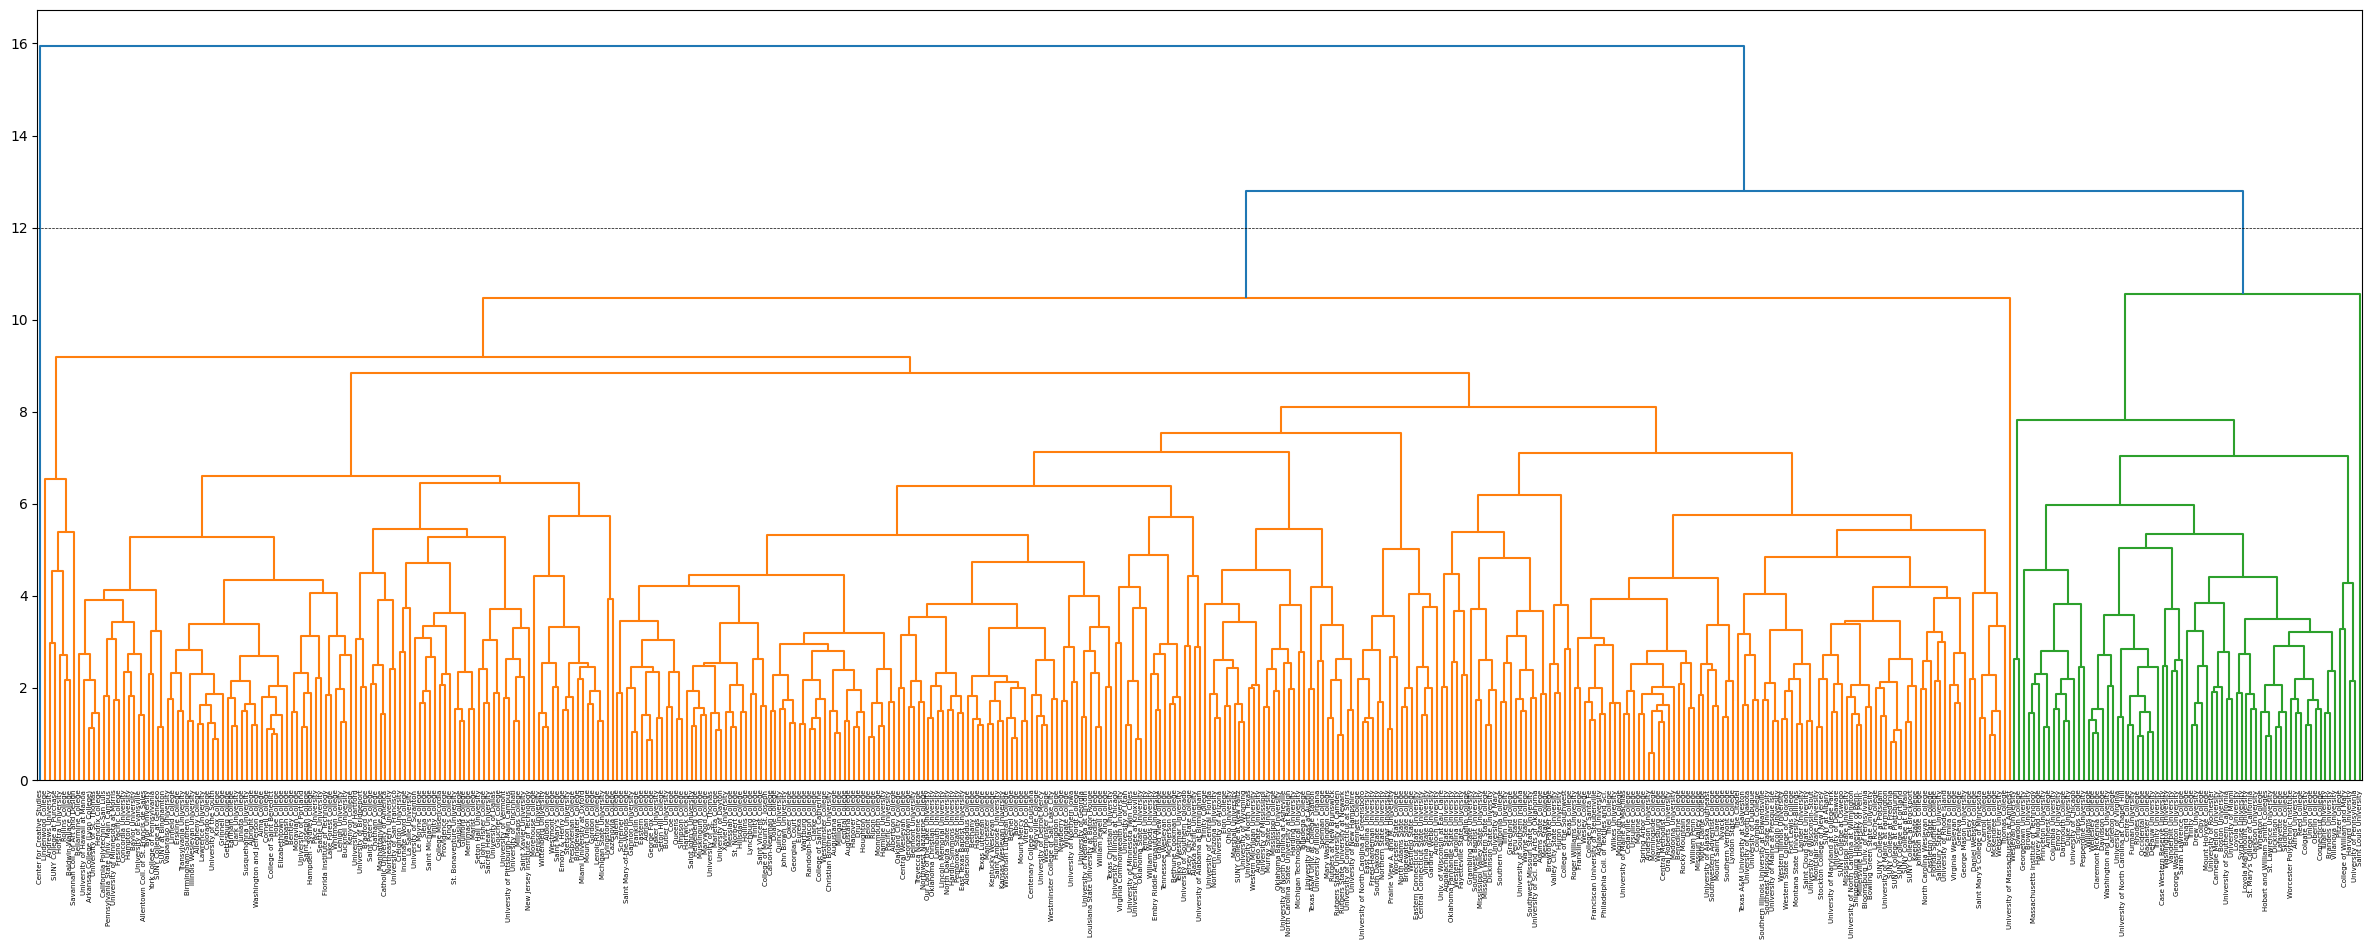

In [14]:
Z = linkage(uni_df_norm, method='complete', optimal_ordering=True)
plt.figure(figsize=(30,10))
dendrogram(Z, labels=uni_df_norm.index)
plt.axhline(y=12, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

There are three distinct color with orange, green, and the lone blue on the left.

## Cluster Characterization

In [15]:
memb = fcluster(Z, t=3, criterion='maxclust')
uni_df["Cluster"] = memb
uni_df_groups = uni_df.groupby("Cluster")

/tmp/ipykernel_18458/136780486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uni_df["Cluster"] = memb


In [16]:
uni_df_groups.get_group(1).describe().loc[["mean", "50%"]][cont_list]

,% new stud. from top 10%,% new stud. from top 25%,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
mean,22.781955,50.724311,9401.293233,2065.66416,2013.015038,374.766917,535.240602,1349.879699,70.310777,14.723308,62.273183
50%,21.000000,51.000000,9150.000000,1975.00000,2000.000000,273.000000,500.000000,1200.000000,73.000000,14.100000,63.000000


In [17]:
uni_df_groups.get_group(2).describe().loc[["mean", "50%"]][cont_list]

,% new stud. from top 10%,% new stud. from top 25%,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
mean,57.788732,83.84507,17162.746479,3071.816901,2724.521127,406.43662,599.661972,1108.478873,90.408451,9.788732,84.309859
50%,56.000000,84.00000,18200.000000,3000.000000,2740.000000,325.00000,595.000000,960.000000,91.000000,10.300000,84.000000


In [18]:
uni_df_groups.get_group(3).describe().loc[["mean", "50%"]][cont_list]

,% new stud. from top 10%,% new stud. from top 25%,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
mean,1.0,20.0,11230.0,3843.0,2800.0,130.0,2340.0,620.0,8.0,6.8,47.0
50%,1.0,20.0,11230.0,3843.0,2800.0,130.0,2340.0,620.0,8.0,6.8,47.0


Group 1: More Open  
Group 2: More Restrictive  
Group 3: 47% Graduation Rate  

## Categorical Analysis

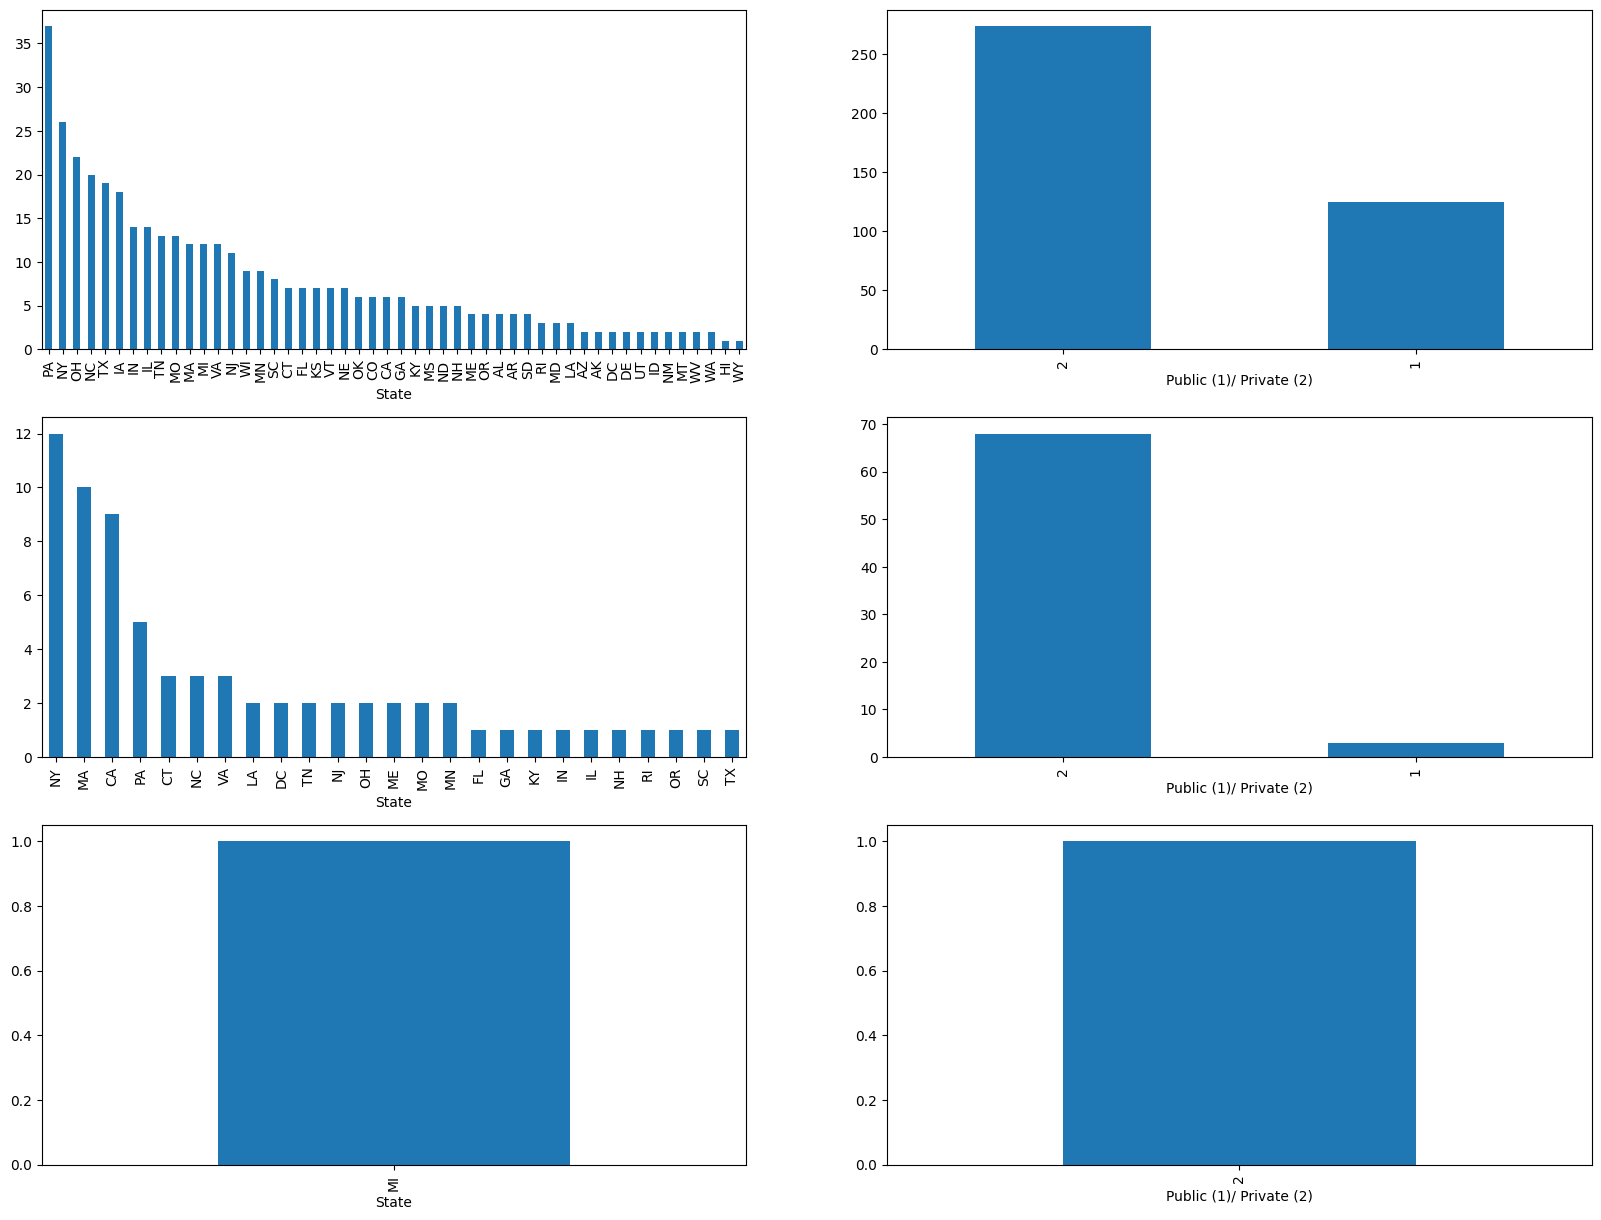

In [20]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(20,15) )
cat_list = uni_df.columns.values[0:2]
axes= axes.flatten()
current_ax = 0;

for i in range(1,4):
    for col in cat_list:
        counts = uni_df_groups.get_group(i)[col].value_counts()
        counts.plot(kind='bar', ax=axes[current_ax])
        current_ax+=1

plt.show()

One of the clusters is just one school  
The other two seem to be more private than public school. There is no other decirnable difference between the two clusters.

## External Information

We could look into the majors that they offer or the amount fo majors that they offer so that we get more context for the variety of students going into whichever university.  
We could also look into the scholarships that are given, financial aid to be more exact, so that we can see where the students are getting the most aid for their degree which might cause students to prefer one type of school over the other.

## Missing Data Imputation

In [33]:
harvard = pd.DataFrame(harvard)
harvard = harvard.T

In [36]:
harvard.insert(column="Cluster Labels", value=0, loc=19)
harvard

,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate,Cluster Labels
Harvard University,MA,2,13865.0,2165.0,1606.0,90.0,100.0,6862.0,320.0,18485.0,18485.0,3370.0,3040.0,1335.0,500.0,1920.0,97.0,9.9,100.0,0


In [39]:
cluster1 = uni_df_groups.get_group(1)[cont_list].describe().loc[["mean"]]
cluster2 = uni_df_groups.get_group(2)[cont_list].describe().loc[["mean"]]
cluster3 = uni_df_groups.get_group(3)[cont_list].describe().loc[["mean"]]

def find_distance(cluster, values):
    total_sum = 0
    for column in cluster.columns:
        total_sum += (cluster[column].values[0] -  values[column].values[0])**2

    total_sum = np.sqrt(total_sum)
    print(total_sum)

find_distance(cluster1, harvard)
find_distance(cluster2, harvard)
find_distance(cluster3, harvard)

9301.997129866751
1862.5551379272194
7711.617185130496


In [40]:
harvard_copy = harvard.copy()

for col in cont_list:
    if np.isnan(harvard_copy[col].values[0]):
        print(col)
        harvard_copy[col] = cluster2[col]

harvard_copy

,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate,Cluster Labels
Harvard University,MA,2,13865.0,2165.0,1606.0,90.0,100.0,6862.0,320.0,18485.0,18485.0,3370.0,3040.0,1335.0,500.0,1920.0,97.0,9.9,100.0,0


# Pharmaceutical Industry

In [124]:
pi_df = dmba.load_data('Pharmaceuticals.csv')
pi_df = pi_df.set_index(['Symbol', 'Name'])
pi_df

,,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
Symbol,Name,,,,,,,,,,,,
ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE
BAY,Bayer AG,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,Hold,GERMANY,NYSE
BMY,Bristol-Myers Squibb Company,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6,Moderate Sell,US,NYSE
CHTT,"Chattem, Inc",0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,Moderate Buy,US,NASDAQ
ELN,"Elan Corporation, plc",0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3,Moderate Sell,IRELAND,NYSE


## Use only the numerical variables (1–9) to cluster the 21 firms. Justify the various choices made in conducting the cluster analysis, such as weights for different variables, the specific clustering algorithm(s) used, the number of clusters formed, and so on.

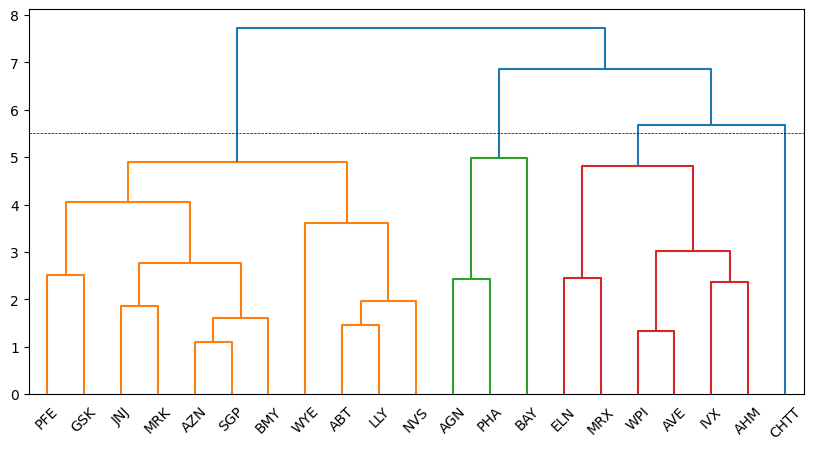

In [126]:
cont_list = list(pi_df.columns[0:9])

pi_norm = pi_df.copy()
pi_norm[cont_list] = StandardScaler().fit_transform(pi_norm[cont_list])

plt.figure(figsize=(10,5))
Z = linkage(pi_norm[cont_list], metric="euclidean", method="complete", optimal_ordering=True)
dendrogram(Z, labels=pi_norm.index.get_level_values(0))
plt.axhline(y=5.5, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

I used complete because it gave me better cluster groups, and now I have four groups

## Interpret the clusters with respect to the categorical variables used in forming the clusters

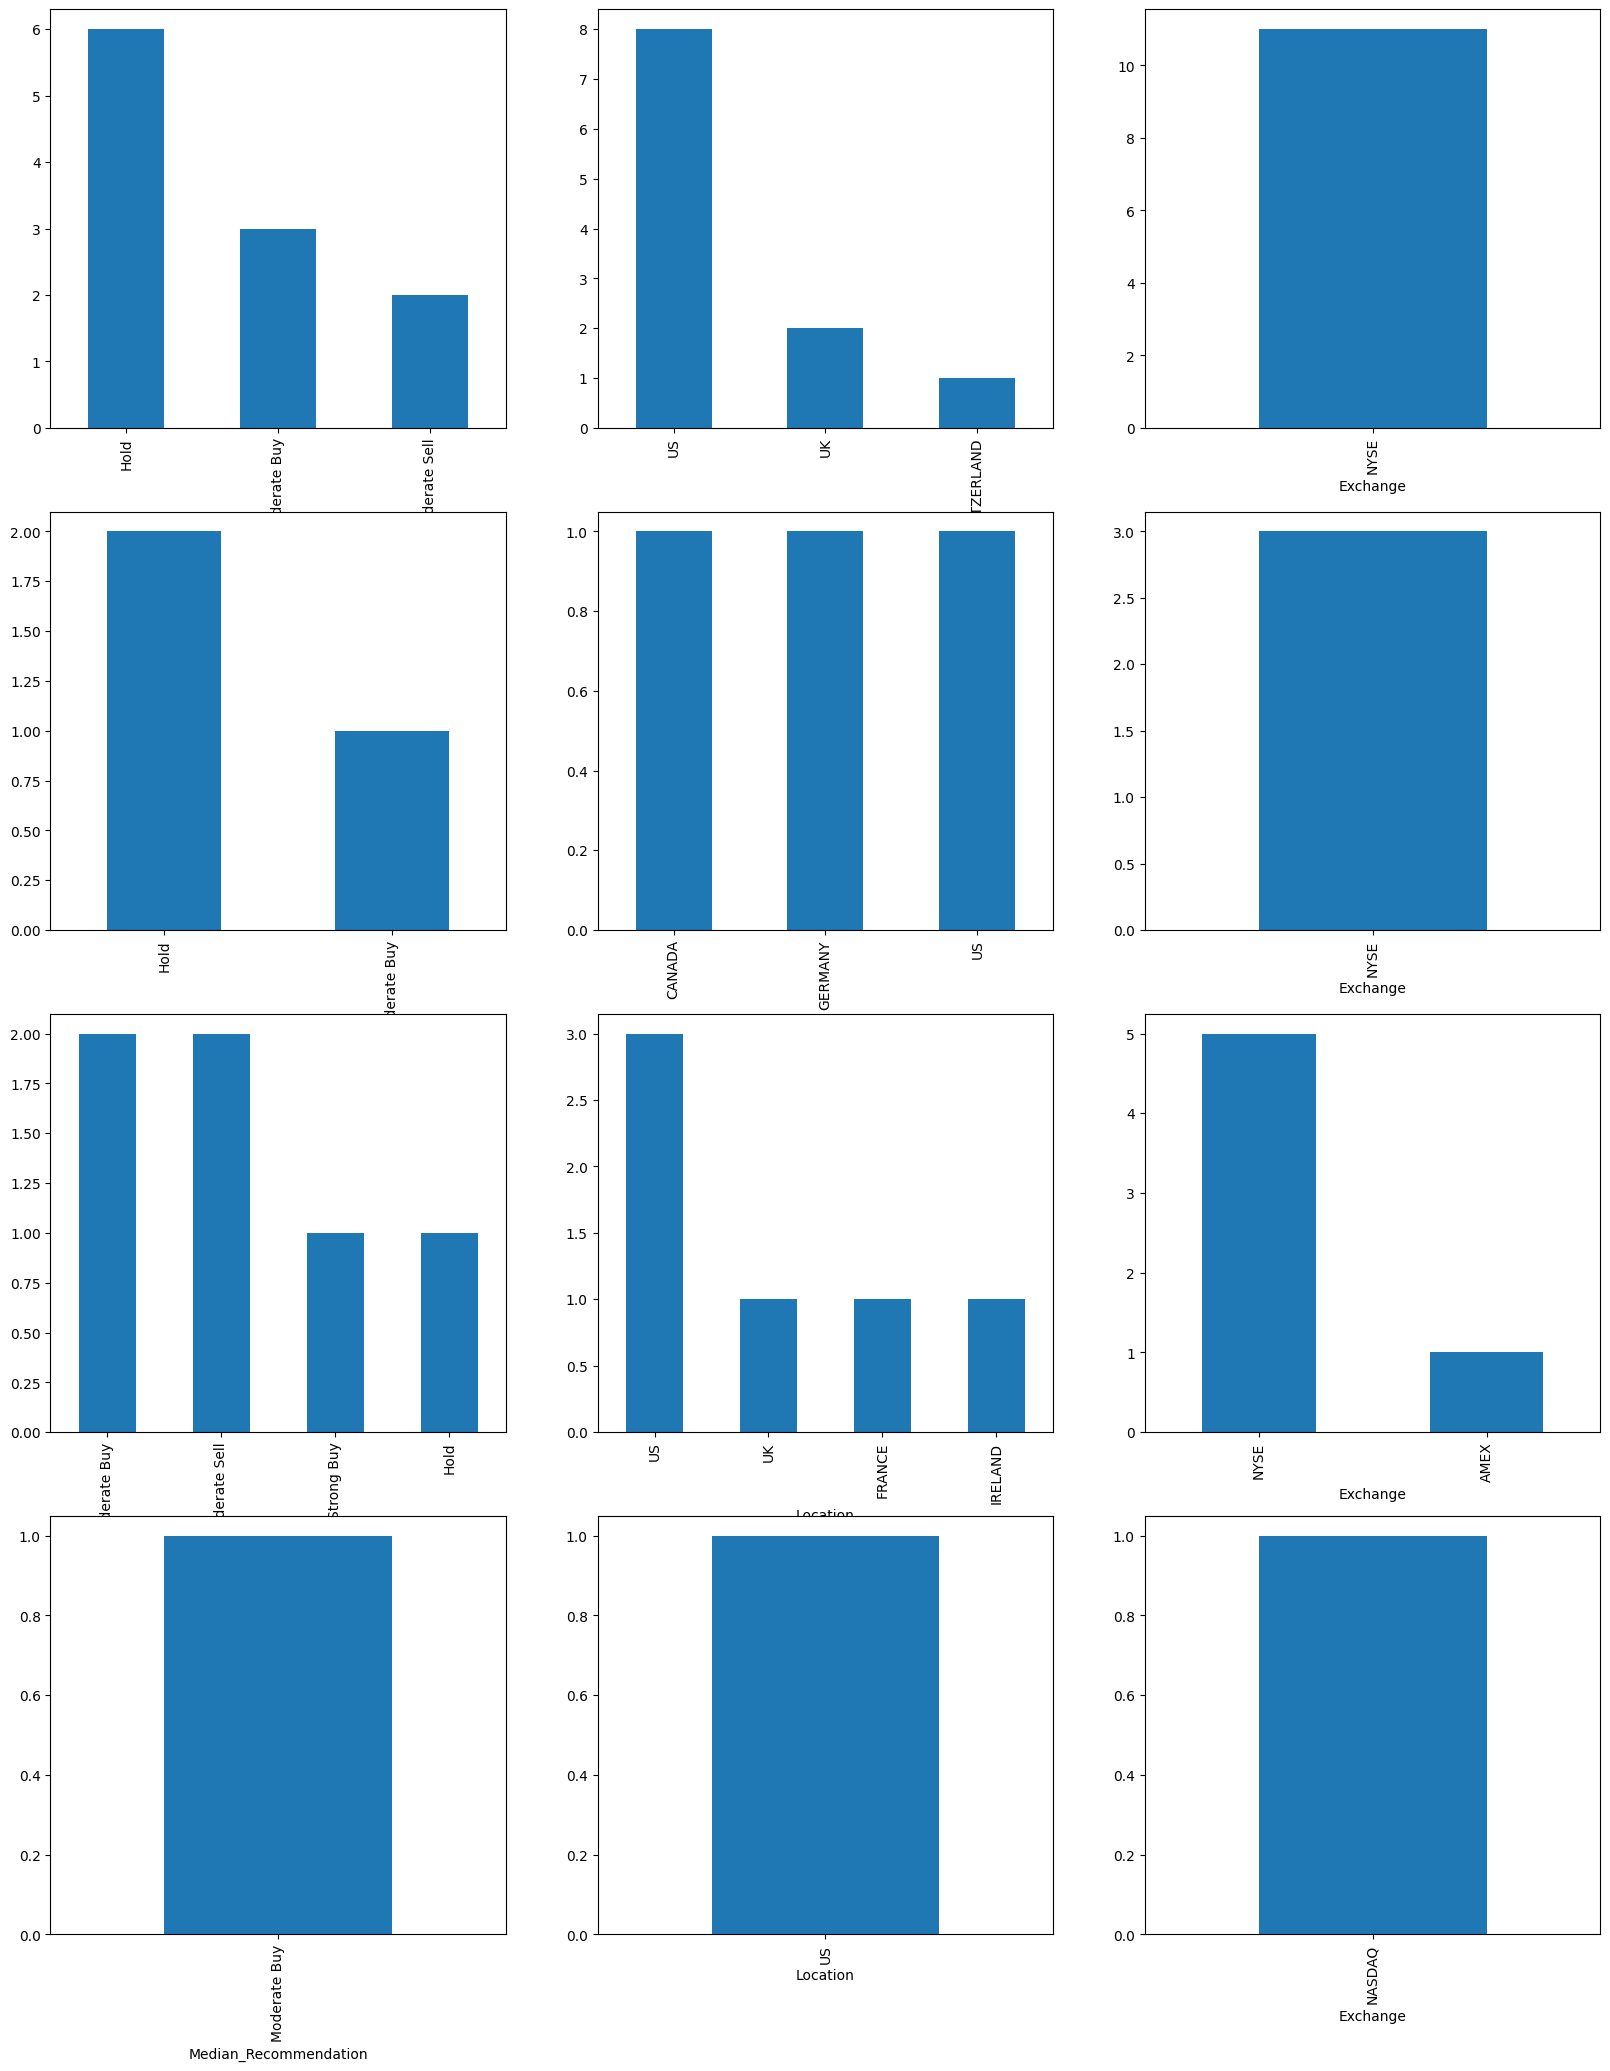

In [127]:
memb = fcluster(Z, t=4, criterion='maxclust')
pi_df["Cluster"] = memb
pi_df_groups = pi_df.groupby("Cluster")

fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(20,25) )
cat_list = pi_df.columns.values[9:12]
cluster_groups = pi_df.groupby(["Cluster"])
axes= axes.flatten()
current_ax = 0;

for i in range(1,5):
    for col in cat_list:
        counts = pi_df_groups.get_group(i)[col].value_counts()
        counts.plot(kind='bar', ax=axes[current_ax])
        current_ax+=1

plt.show()

## Is there a pattern in the clusters with respect to the catergorical variables?

In [130]:
pi_df_groups.get_group(1).describe().loc[["mean", '50%']]

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Cluster
mean,97.113636,0.433636,20.954545,35.7,14.954545,0.8,0.325455,10.164545,20.172727,1.0
50%,73.840000,0.460000,21.500000,31.0,15.000000,0.8,0.280000,8.560000,20.600000,1.0


In [129]:
pi_df_groups.get_group(2).describe().loc[["mean", '50%']]

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Cluster
mean,26.906667,0.64,55.633333,10.1,4.2,0.7,0.316667,6.996667,5.133333,2.0
50%,16.900000,0.41,56.500000,12.9,5.5,0.6,0.350000,9.160000,5.500000,2.0


In [131]:
pi_df_groups.get_group(3).describe().loc[["mean", '50%']]

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Cluster
mean,10.216667,0.583333,18.55,15.766667,6.566667,0.533333,0.710,23.601667,14.133333,3.0
50%,2.930000,0.555000,20.00,15.000000,6.800000,0.550000,0.635,27.995000,13.100000,3.0


In [132]:
pi_df_groups.get_group(4).describe().loc[["mean", '50%']]

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Cluster
mean,0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,4.0
50%,0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,4.0


There is too little data for us to determine any significant cluster groupings apart from the fourth cluster being entirely NASDAQ

## Provide an appropriate name for each cluster using any or all of the variables in the dataset.

1: High Market Cap
2: High Revenue Growth
3: High Asset Turnover
4: NASDAQ

# Customer Rating of Breakfast Cereals

In [151]:
c_df = dmba.load_data('Cereals.csv')
c_df = c_df.dropna(axis=0, how="any")
c_df = c_df.set_index('name')
c_df

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445


Apply hierarchical clustering to the data using Euclidean distance to the normalized measurements. Compare the dendrograms from single linkage and complete linkage, and look at cluster centroids. Comment on the structure of the clusters and on their stability.

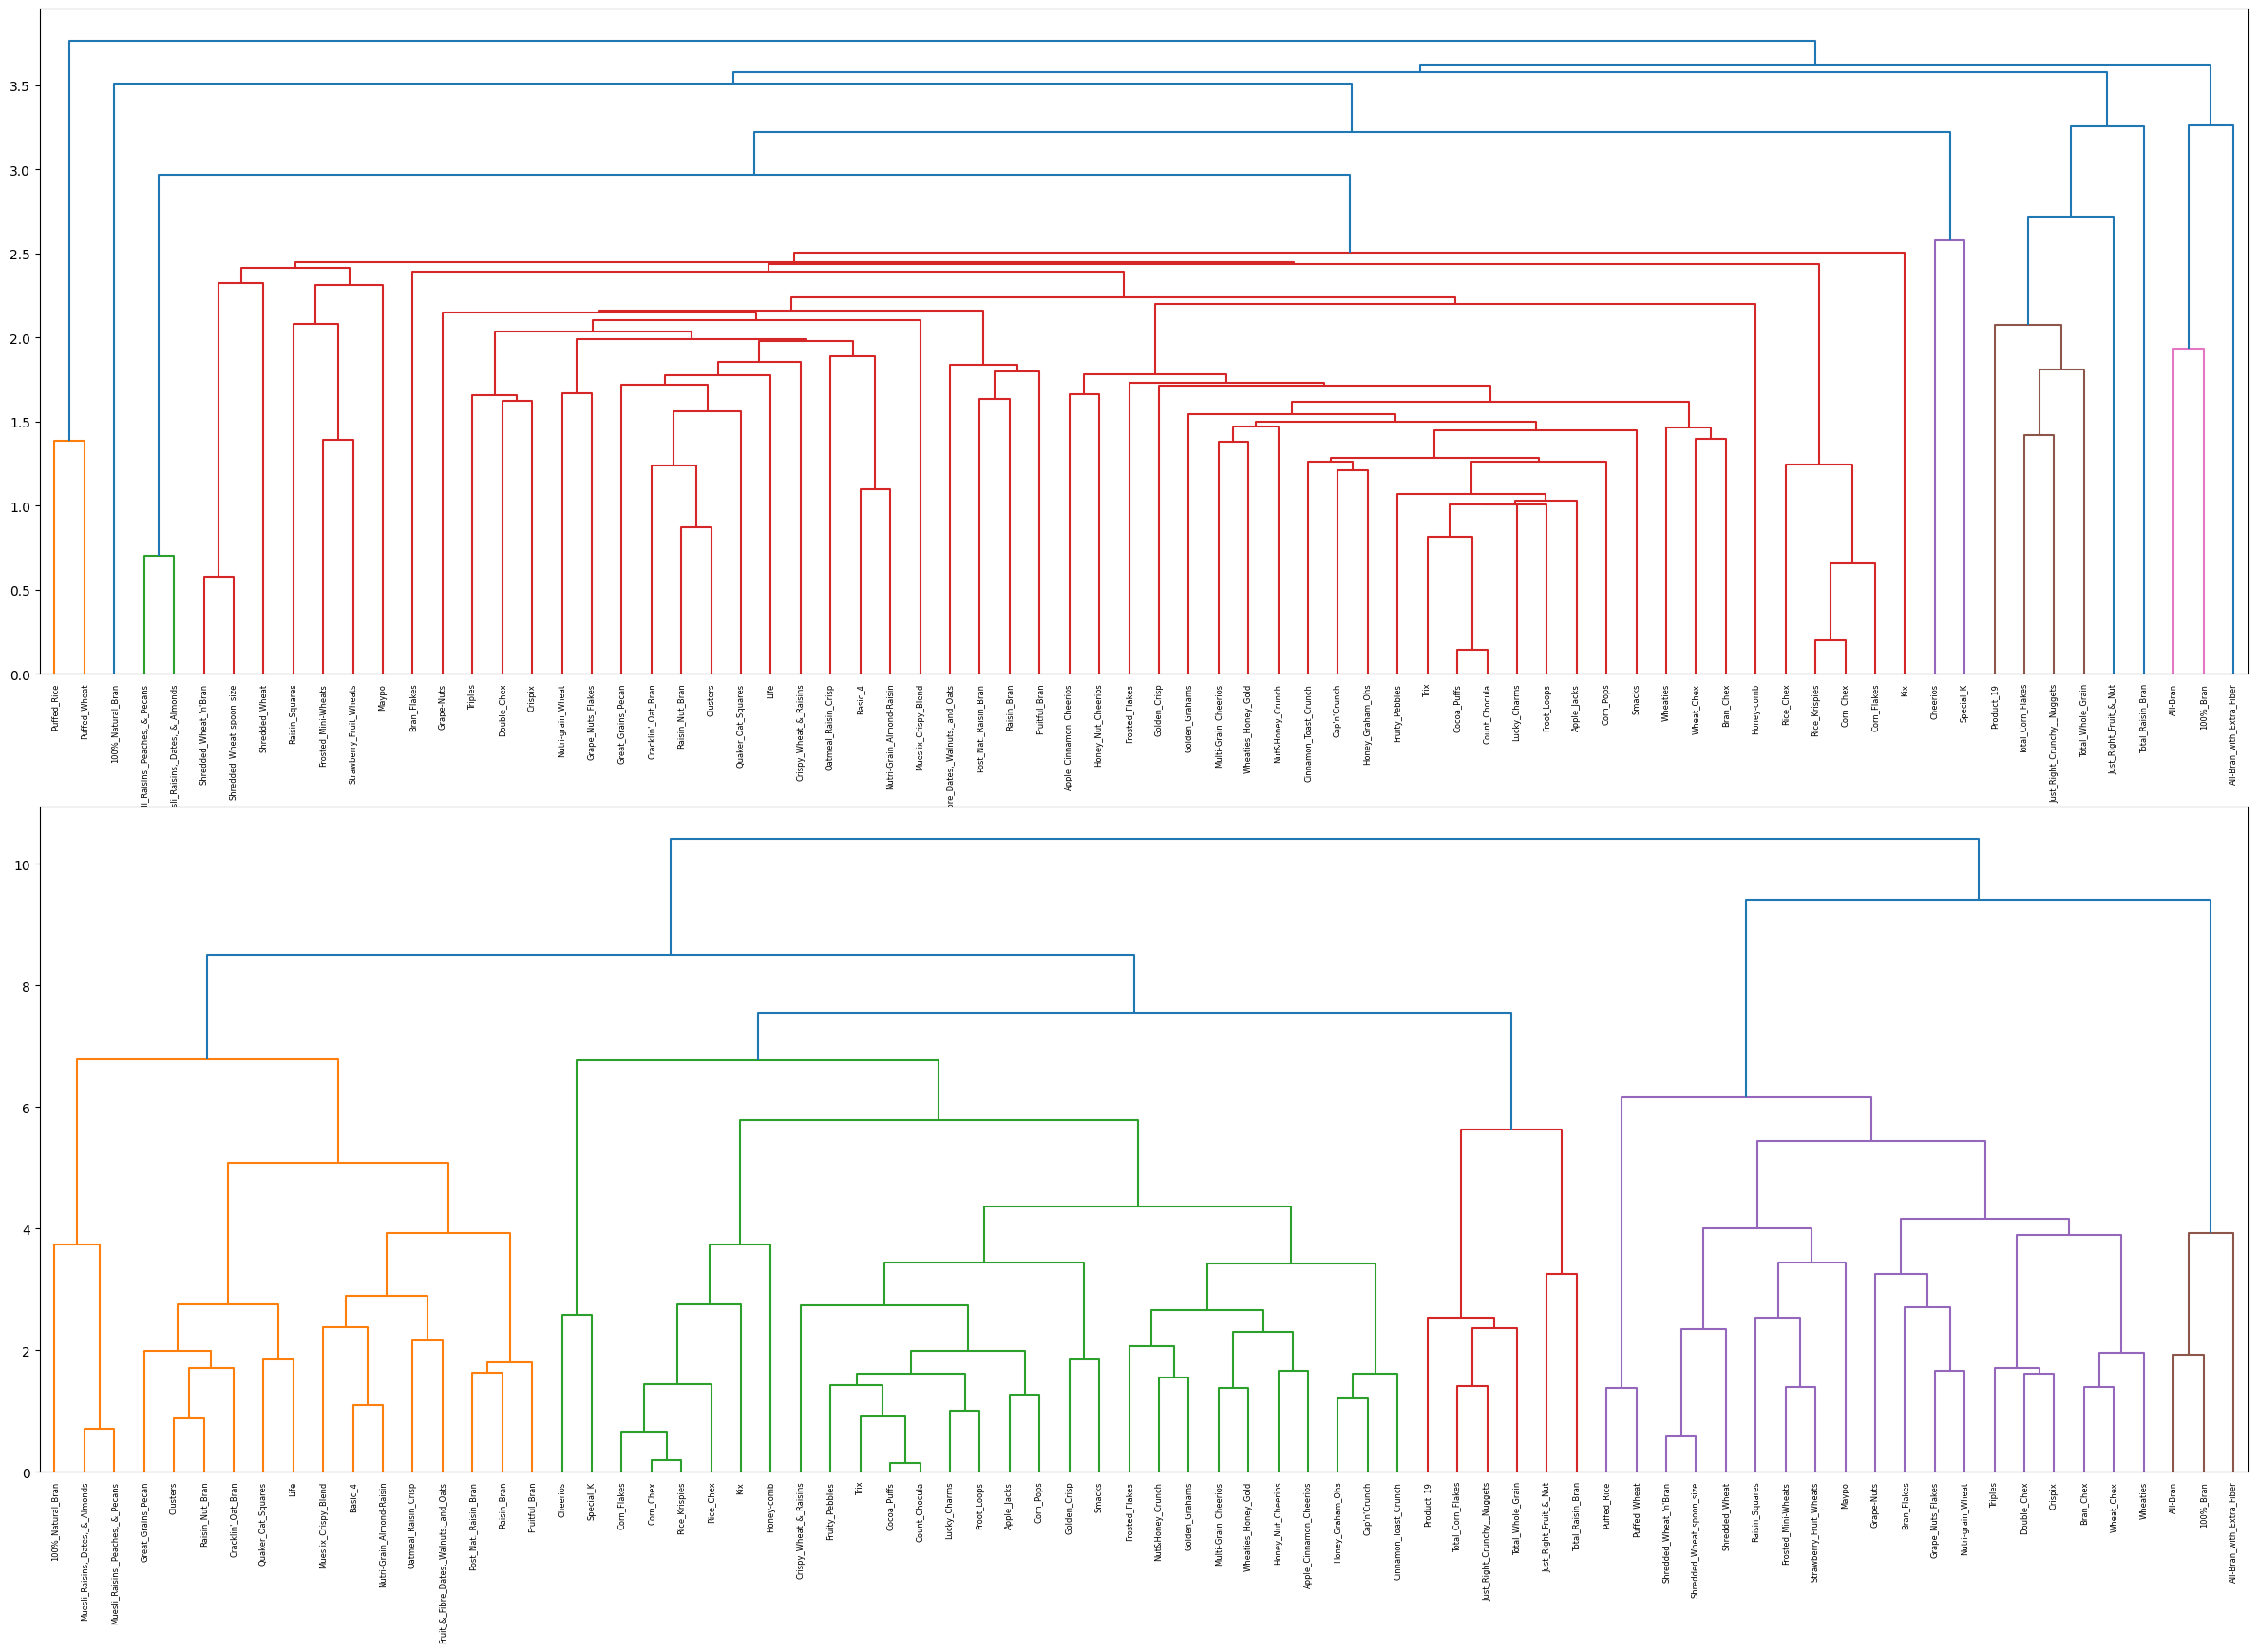

In [156]:
cont_list = c_df.columns.values[3:]
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(30,20))
c_norm = c_df.copy()

c_norm = StandardScaler().fit_transform(c_norm[cont_list])
Z = linkage(c_norm, metric="euclidean", method="single", optimal_ordering=True)
dendrogram(Z, ax=axes[0], labels=c_df.index)
axes[0].axhline(y=2.6, color='black', linewidth=0.5, linestyle='dashed')
Z = linkage(c_norm, metric="euclidean", method="complete", optimal_ordering=True)
dendrogram(Z, ax=axes[1], labels=c_df.index)
axes[1].axhline(y=7.2, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

It seems that complete has better stability for the data at hand. The clusters on the complete seem to be more collected together once you have the main parts and the single seems to be very erratic in where the clusters are. The cluster heights on the single are also much lower than those in the complete with the complete having a wider range of values that it can be.

## Which method leads to the most insightful or meaningful clusters?

Complete leads to the most meaningful clusters as that is the one with the most stable and more concise in terms of amount of clusters actually being visualized.

## Choose one of the methods. How many clusters would you use? What distance is used for this cutoff?

Complete: I would use 3 clusters where the cutoff would be 9.

## The elementary public schools would like to choose a set of cereals to include in their daily cafeterias. Every day a different cereal is offered, but all cereals should support a healthy diet. For this goal, you are requested to find a cluster of “healthy cereals.” Should the data be normalized? If not, how should they be used in the cluster analysis?

I would make the data not normalized instead using a min-max scaler to better cluster them. This allows it to be viewed as what ratio is the cereal being better at than the rest of the cereals in the vitamins and other content. That way when clusters are formed the better cereals will be bunched up together.

# Marketing to Frequent Fliers

In [2]:
air_df=dmba.load_data('EastWestAirlinesCluster.csv')
air_df = air_df.set_index('ID#')
air_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


## Apply hierarchical clustering with Euclidean distance and Ward’s method. Make sure to normalize the data first. How many clusters appear?

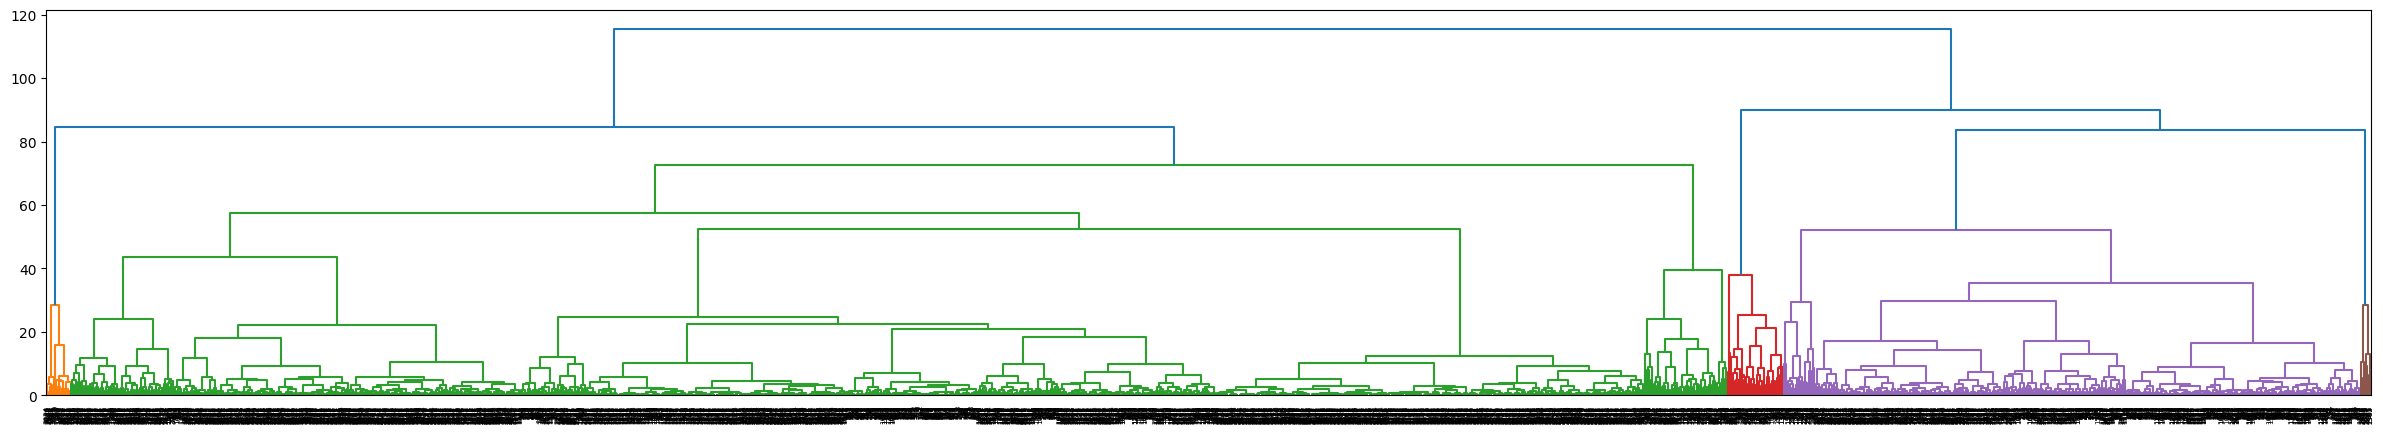

In [4]:
cont_list = list(air_df.columns[0:-1])
air_norm = air_df.copy()
air_norm[cont_list] = StandardScaler().fit_transform(air_norm[cont_list])

plt.figure(figsize=(30,5))
Z = linkage(air_norm[cont_list], metric="euclidean", method="ward", optimal_ordering=True)
dendrogram(Z, labels=air_norm.index)
plt.show()

There are five distinct clusters in the data.

## What would happen if the data were not normalized?

Biasing in the data would occur leading to things with biiger scales getting more of an importance in the clustering.

## Compare the cluster centroid to characterize the different clusters, and try to give each cluster a label.

## To check the stability of the clusters, remove a random 5% of the data (by taking a random sample of 95% of the records), and repeat the analysis. Does the same picture emerge

In [9]:
air_dupli = air_df.sample(frac=0.95).copy()
air_dupli

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
3056,20391,0,1,1,1,90,3,0,0,2884,0
2020,137778,0,3,1,1,19557,18,0,0,4599,0
1813,13878,0,1,1,1,0,0,0,0,4317,0
1005,5274,0,1,1,1,2074,11,0,0,5834,1
1156,16872,0,1,1,1,28964,7,0,0,5479,1
...,...,...,...,...,...,...,...,...,...,...,...
1490,36296,0,1,1,1,5780,6,0,0,4600,0
3533,3625,0,1,1,1,2000,9,0,0,1431,0
937,22988,0,2,1,1,9347,14,1200,4,5944,1


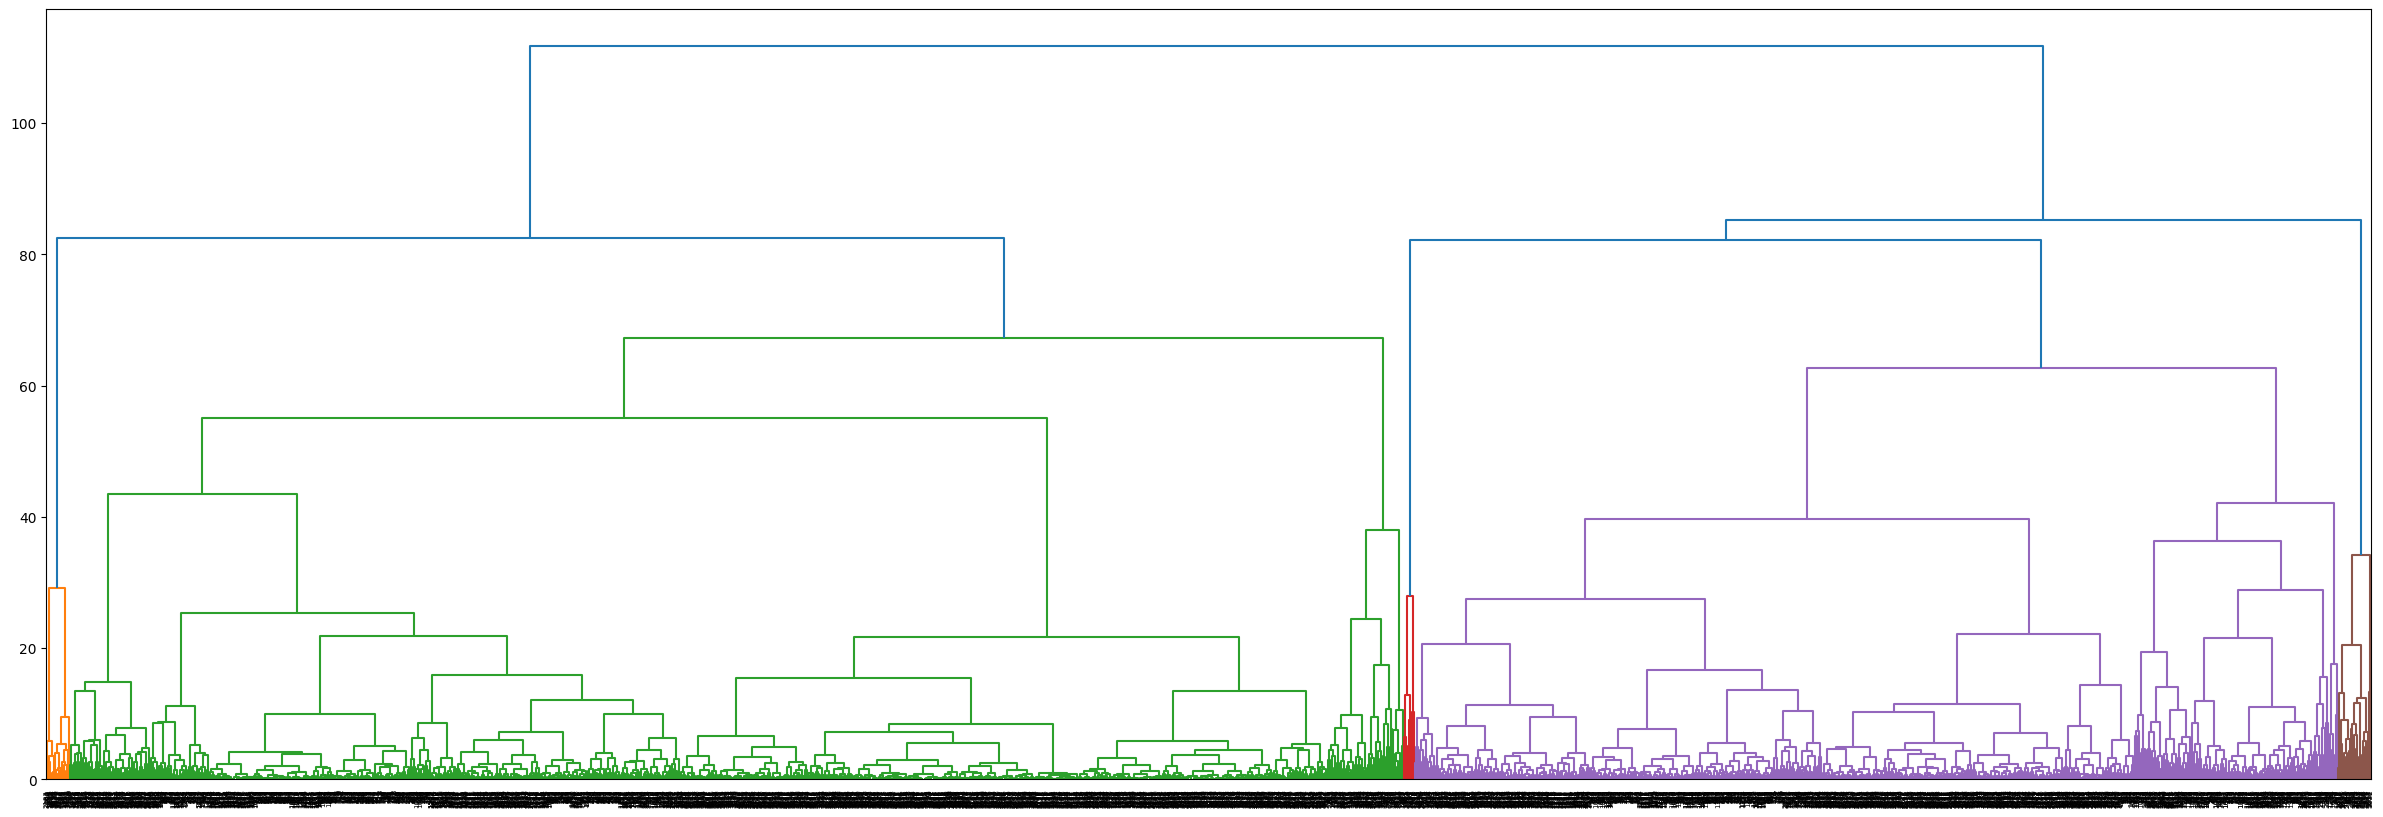

In [8]:
air_dupli_norm = StandardScaler().fit_transform(air_dupli[cont_list])
plt.figure(figsize=(30,10))
Z = linkage(air_dupli_norm, metric="euclidean", method="ward", optimal_ordering=True)
dendrogram(Z, labels=air_dupli.index)
plt.show()

A similar 5 clustered picture emerges from the picture only difffering by the width of each of the clusters

## Use k-means clustering with the number of clusters that you found above. Does the same picture emerge?

In [27]:
k_cluster = KMeans(n_clusters=5).fit_predict(air_norm)
air_df["K_cluster"] = k_cluster
air_df.groupby("K_cluster").get_group(0).describe().loc[["count", "mean", "50%"]]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K_cluster
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.0
mean,120546.864662,142.939014,3.809524,1.001671,1.001671,40651.107769,18.898079,333.300752,0.978279,4872.955723,0.597327,0.0
50%,89413.000000,0.000000,4.000000,1.000000,1.000000,35098.000000,17.000000,0.000000,0.000000,4925.000000,1.000000,0.0


In [28]:
air_df.groupby("K_cluster").get_group(1).describe().loc[["count", "mean", "50%"]]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K_cluster
count,15.0,15.0,15.000000,15.0,15.000000,15.000000,15.000000,15.000000,15.0,15.000000,15.000000,15.0
mean,138061.4,78.8,3.466667,1.0,4.066667,93927.866667,28.066667,506.666667,1.6,4613.866667,0.533333,1.0
50%,108081.0,0.0,4.000000,1.0,4.000000,95598.000000,30.000000,0.000000,0.0,4103.000000,1.000000,1.0


In [29]:
air_df.groupby("K_cluster").get_group(2).describe().loc[["count", "mean", "50%"]]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K_cluster
count,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.00000,1169.000000,1169.000000,1169.0
mean,55064.510693,119.035073,1.203593,1.015398,1.000855,4794.130881,7.259196,262.602224,0.81095,5697.384089,0.284859,2.0
50%,33964.000000,0.000000,1.000000,1.000000,1.000000,2875.000000,6.000000,0.000000,0.00000,5531.000000,0.000000,2.0


In [30]:
air_df.groupby("K_cluster").get_group(3).describe().loc[["count", "mean", "50%"]]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K_cluster
count,158.000000,158.000000,158.000000,158.000000,158.0,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.0
mean,196252.063291,785.386076,2.253165,1.037975,1.0,34652.759494,28.164557,5475.860759,16.151899,4774.841772,0.810127,3.0
50%,123922.000000,0.000000,1.000000,1.000000,1.0,19360.500000,26.500000,4585.000000,14.000000,4856.500000,1.000000,3.0


The K means cluster only has 4 clusters that it makes.

## Which clusters would you target for offers, and what types of offers would you target to customers in that cluster?

With the kmeans cluster I would target a days since enrollement for group cluster 3 since they dont have many awards that they have gotten

# Discovering Frequent Flyer Groups with DBSCAN

## A

In [3]:
# A 
air_df=dmba.load_data('EastWestAirlinesCluster.csv')
air_df = air_df.set_index('ID#')
cont_list = list(air_df.columns[0:-1])
air_norm = air_df.copy()
air_norm[cont_list] = StandardScaler().fit_transform(air_norm[cont_list])

air_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0
2,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0
3,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0
4,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0
5,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1
4018,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1
4019,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1


## B

In [7]:
# B
nbrs = NearestNeighbors(n_neighbors=2).fit(air_norm)
distances, indicies = nbrs.kneighbors(air_norm)
sorted_distances = np.sort(distances, axis=0)

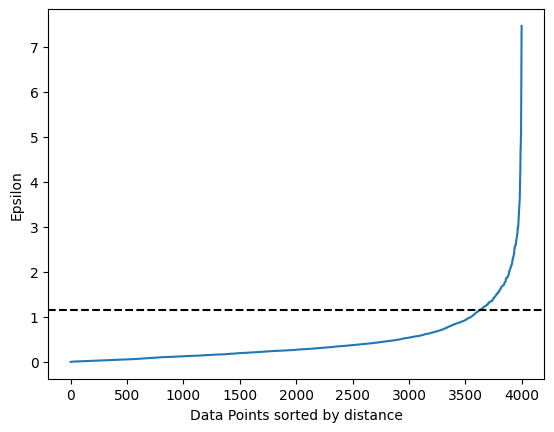

In [14]:
plt.plot(sorted_distances[:,1])
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.axhline(1.15, linestyle="dashed", color="black")
plt.show()

In [17]:
clusters = DBSCAN(eps = 1.15, min_samples=5).fit(air_norm)
clusters.labels_

array([0, 0, 0, ..., 0, 0, 0])

## C

In [24]:
air_df["DBSCAN"] = clusters.labels_
print("Number of clusters", int(air_df["DBSCAN"].describe().loc["max"]))

Number of clusters 3


In [36]:
# Number of outliers 466
air_df.groupby("DBSCAN").get_group(-1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,DBSCAN
ID#,,,,,,,,,,,,
9,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
22,185681,2024,1,1,1,13300,16,1800,9,6896,1,-1
23,20584,0,1,1,1,3450,11,3450,11,6884,0,-1
25,205651,500,1,1,1,4025,21,700,4,7932,0,-1
43,60313,0,1,1,1,10000,26,3250,9,7829,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,-1
3940,130748,0,4,1,1,65510,37,6349,7,1545,0,-1
3957,76595,0,1,1,1,10577,2,9577,1,1515,0,-1


In [37]:
air_df.groupby("DBSCAN").get_group(-1).describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,DBSCAN
count,4.660000e+02,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.0
mean,1.931425e+05,1071.480687,2.772532,1.055794,1.105150,41894.982833,23.435622,2427.051502,7.079399,4802.135193,0.725322,-1.0
std,2.118040e+05,1969.854553,1.644730,0.287927,0.563872,42344.967229,12.864937,3211.079393,8.350657,2099.928877,0.446832,0.0
min,2.310000e+02,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,-1.0
25%,5.686325e+04,0.000000,1.000000,1.000000,1.000000,11302.250000,14.000000,200.000000,1.000000,3148.250000,0.000000,-1.0
50%,1.235810e+05,0.000000,3.000000,1.000000,1.000000,27048.000000,22.000000,1475.000000,4.000000,4910.500000,1.000000,-1.0
75%,2.588800e+05,1463.250000,4.000000,1.000000,1.000000,62081.250000,31.000000,3287.500000,10.750000,6462.750000,1.000000,-1.0
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000,-1.0


Outliers have very low miles but high bonus miles

## D

In [39]:
air_df.groupby("DBSCAN").get_group(0).describe().loc[["mean", '50%']]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,DBSCAN
mean,57991.747432,19.261416,1.970034,1.0,1.0,13872.281393,10.013699,201.642979,0.623573,4033.002854,0.324201,0.0
50%,38031.500000,0.000000,1.000000,1.0,1.0,5399.000000,10.000000,0.000000,0.000000,3969.500000,0.000000,0.0


In [40]:
air_df.groupby("DBSCAN").get_group(1).describe().loc[["mean", '50%']]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,DBSCAN
mean,32976.625,0.0,1.0,2.0,1.0,8326.9375,12.125,50.0,0.3125,3285.9375,0.125,1.0
50%,30426.000,0.0,1.0,2.0,1.0,7811.5000,12.500,0.0,0.0000,3076.0000,0.000,1.0


In [41]:
air_df.groupby("DBSCAN").get_group(2).describe().loc[["mean", '50%']]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,DBSCAN
mean,36524.25,0.0,1.0,3.0,1.0,15518.5,14.5,50.0,0.25,3179.625,0.0,2.0
50%,34180.00,0.0,1.0,3.0,1.0,15170.5,13.0,0.0,0.00,3646.000,0.0,2.0


In [42]:
air_df.groupby("DBSCAN").get_group(3).describe().loc[["mean", '50%']]


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,DBSCAN
mean,60884.4,1902.4,3.4,1.0,1.0,34665.0,15.4,200.0,0.4,4534.0,1.0,3.0
50%,62183.0,1846.0,3.0,1.0,1.0,34997.0,14.0,0.0,0.0,4848.0,1.0,3.0


0: Bonus Mile reward could be useful since they have so much of it  
1: Rewards card reward because they have a high value in cc2_miles  
2: Rewards card reward because they have the highest in cc2_miles  
3: Freq fyler reward because they have the highest in cc1_miles 
I would try to target the fourth group since they have the biggest balance

# Segmenting Consumers of Bath Soap

In [47]:
bs  = dmba.load_data('BathSoapHousehold.csv')
bs = bs.set_index("Member id")
bs

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
Member id,,,,,,,,,,,,,,,,,,,,,
1010010,4,3,10,1,4,4,2,4,1,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.000000,0.130841,0.339564
1010020,3,2,10,2,2,4,4,2,1,19,...,0.347048,0.026834,0.016100,0.014311,0.000000,0.059034,0.000000,0.000000,0.080501,0.000000
1014020,2,3,10,2,4,5,6,4,1,23,...,0.121212,0.033550,0.010823,0.008658,0.000000,0.000000,0.016234,0.000000,0.561688,0.003247
1014030,4,0,0,0,4,0,0,5,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000
1014190,4,1,10,2,3,4,4,3,1,10,...,0.000000,0.000000,0.048193,0.000000,0.000000,0.000000,0.000000,0.000000,0.144578,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167090,2,3,10,2,4,5,5,4,1,15,...,0.000000,0.000000,0.000000,0.000000,0.024931,0.897507,0.000000,0.000000,0.000000,0.000000
1167230,3,3,10,2,3,5,4,4,1,29,...,0.430693,0.074257,0.148515,0.000000,0.039604,0.000000,0.000000,0.089109,0.000000,0.049505
1167340,3,3,17,2,4,4,9,4,1,13,...,0.127148,0.000000,0.030928,0.000000,0.038660,0.000000,0.000000,0.000000,0.180412,0.000000


In [89]:
def prepare_data(df):
    # Purchase behavior variables
    purchase_behavior = [
        'No. of Brands',          # Brand variety
        'Brand Runs',             # Brand switching behavior
        'Total Volume',           # Purchase volume
        'No. of  Trans',          # Transaction frequency
        'Value',                  # Total spending
        'Trans / Brand Runs',     # Loyalty measure
        'Vol/Tran',              # Purchase size
        'Avg. Price '             # Price point preference
    ]
    
    # Purchase basis variables (promotion and pricing sensitivity)
    purchase_basis = [
        'Pur Vol No Promo - %',    # Regular price purchases
        'Pur Vol Promo 6 %',       # Promotional purchases
        'Pur Vol Other Promo %'    # Other promotional purchases
    ]
    
    # Brand share variables
    brand_shares = [
        'Br. Cd. 57, 144',    # Brand A
        'Br. Cd. 55',         # Brand B
        'Br. Cd. 272',        # Brand C
        'Br. Cd. 286',        # Brand D
        'Br. Cd. 24',         # Brand E
        'Br. Cd. 481',        # Brand F
        'Br. Cd. 352',        # Brand G
        'Br. Cd. 5',          # Brand H
        'Others 999'          # Other brands
    ]
    
    # Calculate brand concentration (measure of loyalty)
    df['brand_concentration'] = (df[brand_shares]**2).sum(axis=1)
    
    # Demographic variables (useful for profiling clusters later)
    demographic_vars = [
        'SEC',              # Socio-economic class
        'FEH',              # Family/Household type
        'MT',               # Market type
        'SEX',              # Gender
        'AGE',              # Age
        'EDU',              # Education
        'HS',               # Household size
        'CHILD',            # Number of children
        'CS',               # Customer segment
        'Affluence Index'   # Wealth indicator
    ]
    
    # Proposition categories (can be used for additional insights)
    prop_cats = [col for col in df.columns if col.startswith('PropCat')]
    
    # Combine relevant features for clustering
    behavior_features = purchase_behavior + brand_shares + ['brand_concentration']
    basis_features = purchase_basis + [col for col in df.columns if col.startswith('Pr Cat')] # These are the price categories
    
    return df, behavior_features, basis_features, demographic_vars

In [90]:
def find_optimal_clusters(data, max_clusters=8):
    scores = []
    for k in range(3, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        scores.append(silhouette_score(data, kmeans.labels_))
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(3, max_clusters + 1), scores, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs Number of Clusters')
    plt.show()
    
    return scores.index(max(scores)) + 2

In [79]:
def perform_clustering(df, features, n_clusters):
    # Normalize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df[features])
    
    # Convert scaled data back to dataframe with feature names
    df_scaled = pd.DataFrame(data_scaled, columns=features)
    
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)
    
    return clusters, kmeans.cluster_centers_, df_scaled

In [82]:
def analyze_clusters(df, clusters, features, df_scaled, demographic_vars=None):
    # Add cluster labels to the scaled dataframe
    df_scaled['Cluster'] = clusters
    df['Cluster'] = clusters
    
    # Analyze normalized feature characteristics
    cluster_analysis = df_scaled.groupby('Cluster')[features].mean()
    
    # Create heatmap of normalized cluster characteristics
    plt.figure(figsize=(30, 8))
    sns.heatmap(cluster_analysis, annot=True, cmap='YlGnBu', fmt='.2f', 
                center=0,  # Center the colormap at 0 since data is standardized
                vmin=-2, vmax=2)  # Set limits based on standard deviations
    plt.title('Normalized Cluster Characteristics Heatmap')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # If demographic variables are provided, analyze them too
    if demographic_vars:
        demo_analysis = df.groupby('Cluster')[demographic_vars].agg(['mean', 'median'])
        print("\nDemographic Profile of Clusters:")
        print(demo_analysis)
    
    return cluster_analysis

In [59]:
def build_classification_model(df, features, clusters):
    X = df[features]
    y = clusters
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a decision tree classifier
    clf = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limited depth for interpretability
    clf.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = clf.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Print feature importance
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': clf.feature_importances_
    }).sort_values('importance', ascending=False)
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))
    
    return clf

In [80]:
def main():
    # Load data
    df = dmba.load_data('BathSoapHousehold.csv')
    
    # Prepare data
    df, behavior_features, basis_features, demographic_vars = prepare_data(df)
    
    # Perform clustering analyses
    print("\nAnalyzing purchase behavior clusters...")
    n_clusters_behavior = find_optimal_clusters(StandardScaler().fit_transform(df[behavior_features]))
    behavior_clusters, _, df_scaled_behavior = perform_clustering(df, behavior_features, n_clusters_behavior)
    behavior_analysis = analyze_clusters(df, behavior_clusters, behavior_features, df_scaled_behavior, demographic_vars)
    
    print("\nAnalyzing purchase basis clusters...")
    n_clusters_basis = find_optimal_clusters(StandardScaler().fit_transform(df[basis_features]))
    basis_clusters, _, df_scaled_basis = perform_clustering(df, basis_features, n_clusters_basis)
    basis_analysis = analyze_clusters(df, basis_clusters, basis_features, df_scaled_basis, demographic_vars)
    
    # Combined analysis
    all_features = behavior_features + basis_features
    print("\nAnalyzing combined features clusters...")
    n_clusters_combined = find_optimal_clusters(StandardScaler().fit_transform(df[all_features]))
    combined_clusters, _, df_scaled_combined = perform_clustering(df, all_features, n_clusters_combined)
    combined_analysis = analyze_clusters(df, combined_clusters, all_features, df_scaled_combined, demographic_vars)
    
    # Build classification model
    print("\nBuilding classification model...")
    clf = build_classification_model(df, all_features, combined_clusters)
    
    return df, behavior_analysis, basis_analysis, combined_analysis, clf


Analyzing purchase behavior clusters...


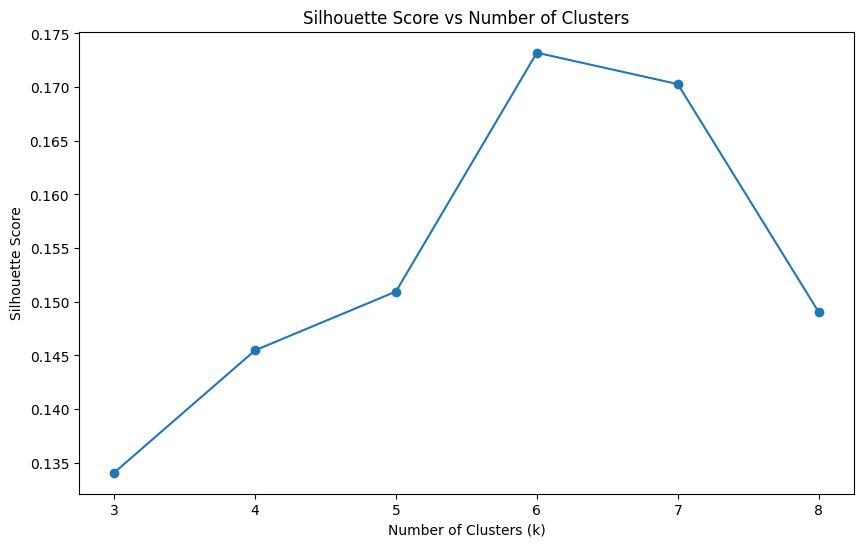

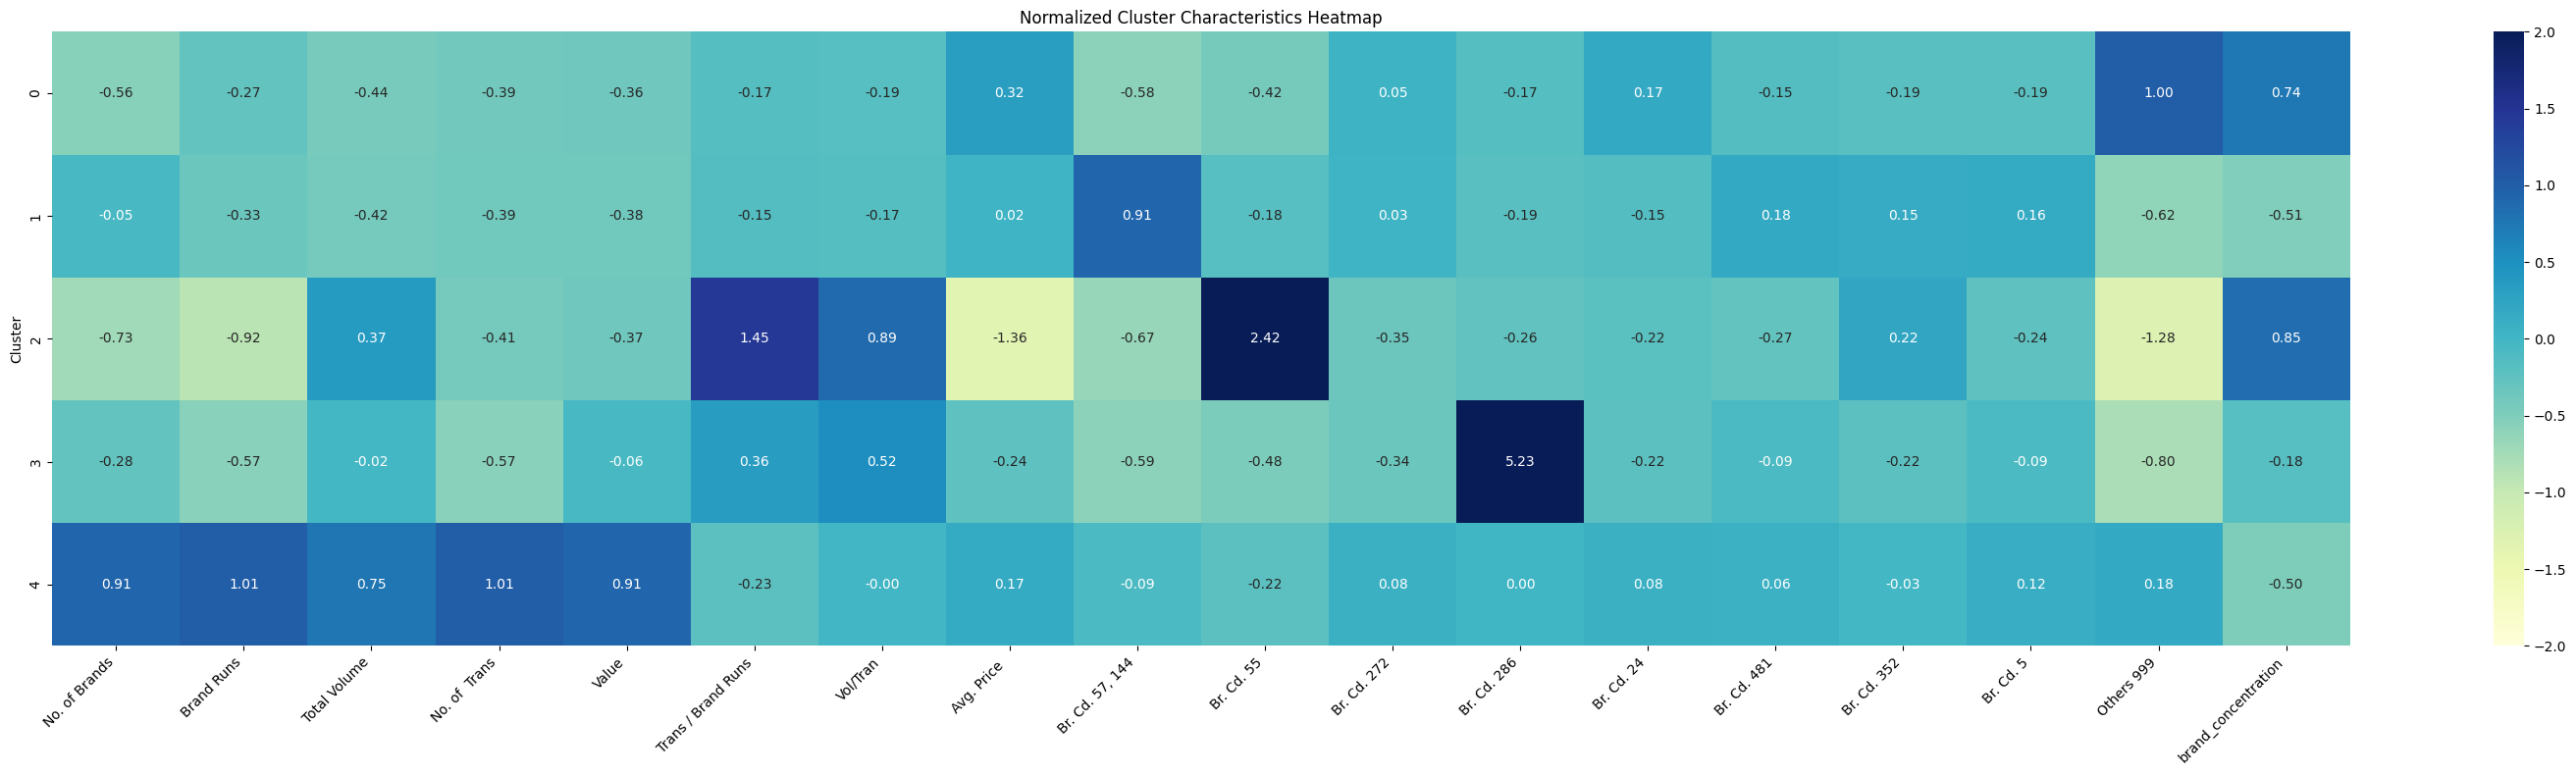


Demographic Profile of Clusters:
              SEC              FEH               MT              SEX         \
             mean median      mean median      mean median      mean median   
Cluster                                                                       
0        2.348837    2.0  1.848837    2.0  7.593023   10.0  1.622093    2.0   
1        2.436464    2.0  1.933702    3.0  7.618785   10.0  1.701657    2.0   
2        3.354839    4.0  2.112903    3.0  8.306452   10.0  1.629032    2.0   
3        2.266667    2.0  1.733333    1.0  7.666667   10.0  1.866667    2.0   
4        2.429412    2.0  2.376471    3.0  9.364706   10.0  1.923529    2.0   

              AGE              EDU               HS            CHILD         \
             mean median      mean median      mean median      mean median   
Cluster                                                                       
0        3.197674    3.0  3.779070    4.0  3.569767    4.0  3.319767    4.0   
1        3.099448

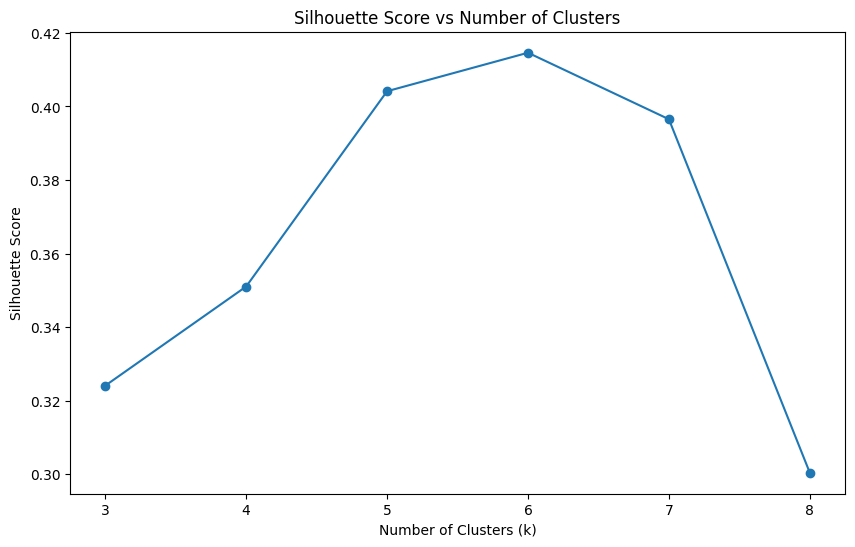

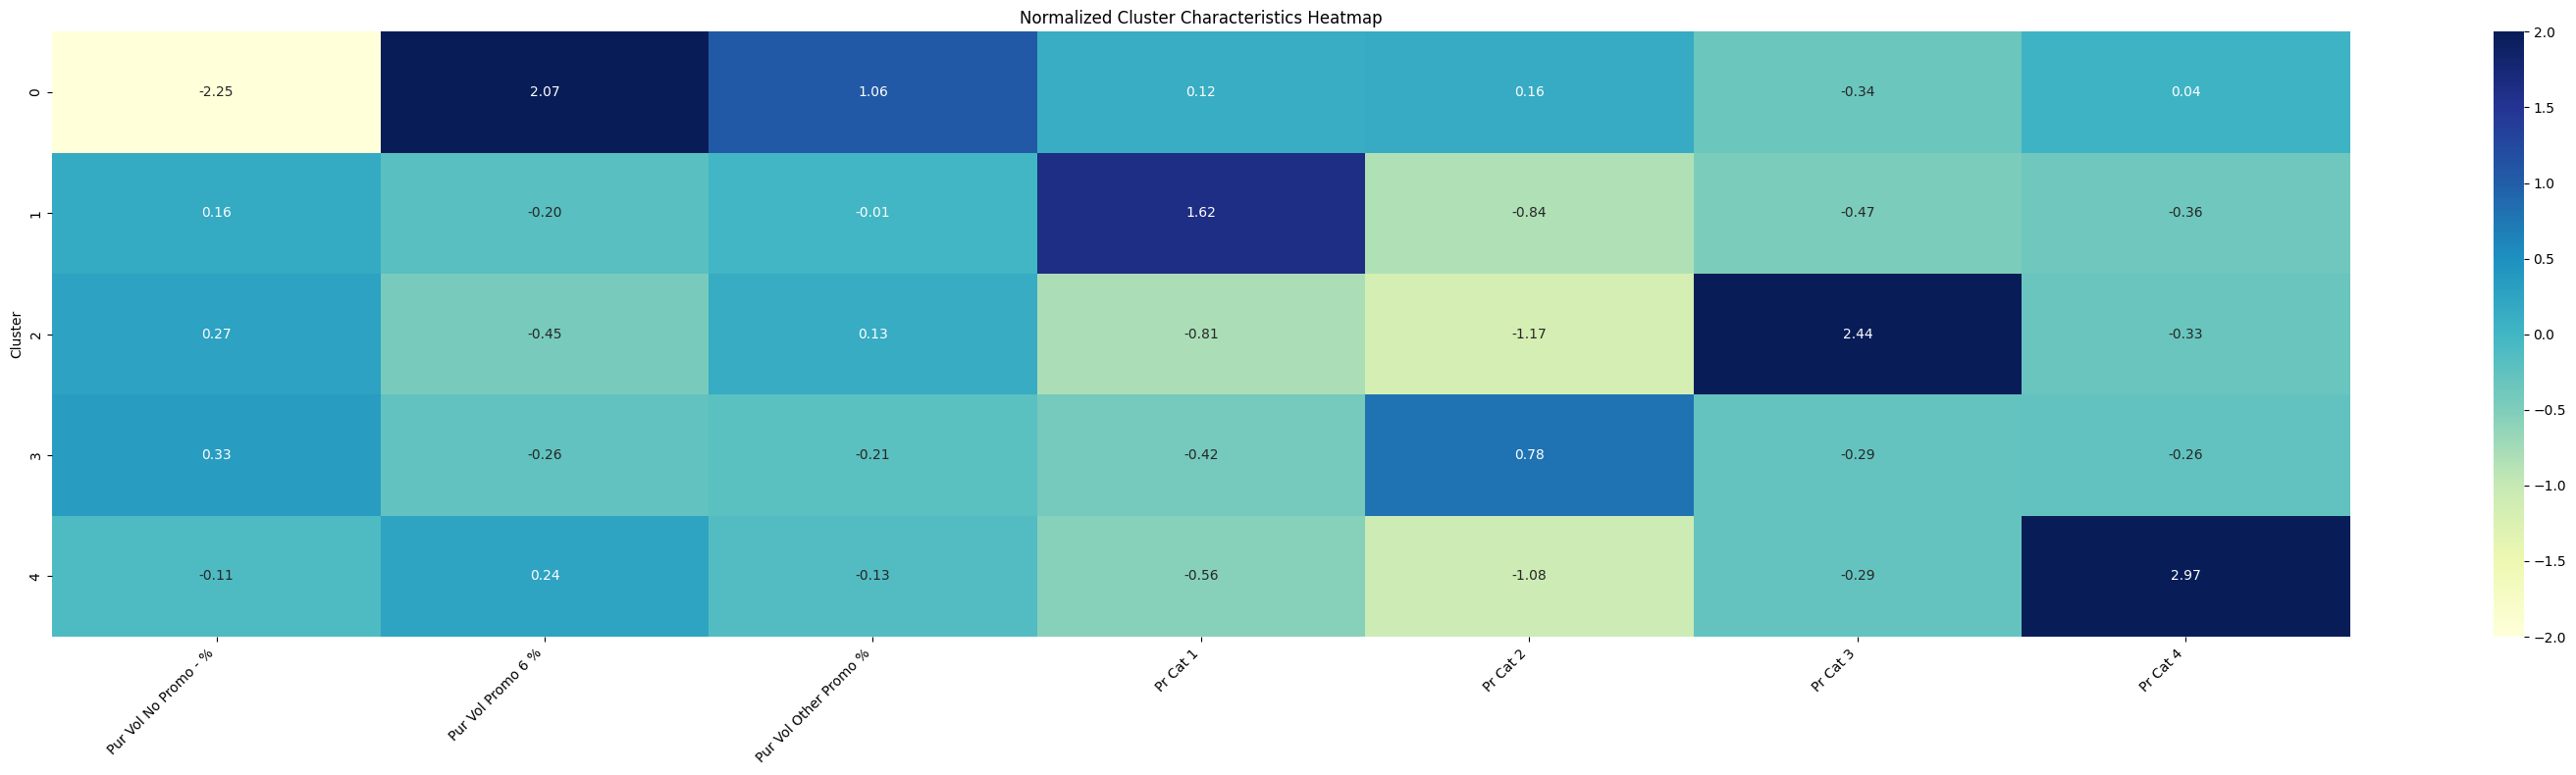


Demographic Profile of Clusters:
              SEC              FEH               MT              SEX         \
             mean median      mean median      mean median      mean median   
Cluster                                                                       
0        2.135593    2.0  1.677966    1.0  7.457627   10.0  1.813559    2.0   
1        1.822581    2.0  1.846774    2.0  7.306452   10.0  1.629032    2.0   
2        3.397260    4.0  2.082192    3.0  7.849315   10.0  1.547945    2.0   
3        2.489865    3.0  2.128378    3.0  8.496622   10.0  1.804054    2.0   
4        3.395833    4.0  2.479167    3.0  9.854167   10.0  1.812500    2.0   

              AGE              EDU               HS            CHILD         \
             mean median      mean median      mean median      mean median   
Cluster                                                                       
0        3.355932    4.0  4.389831    5.0  4.135593    4.0  3.576271    4.0   
1        3.258065

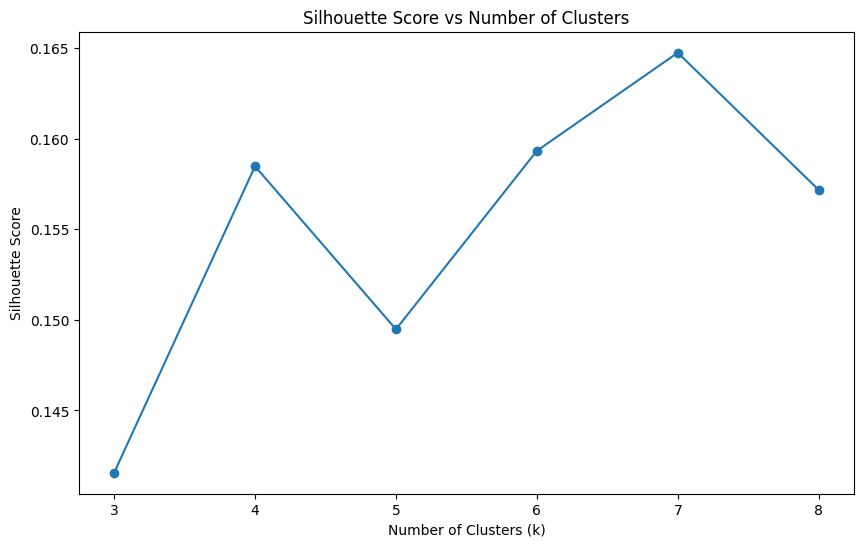

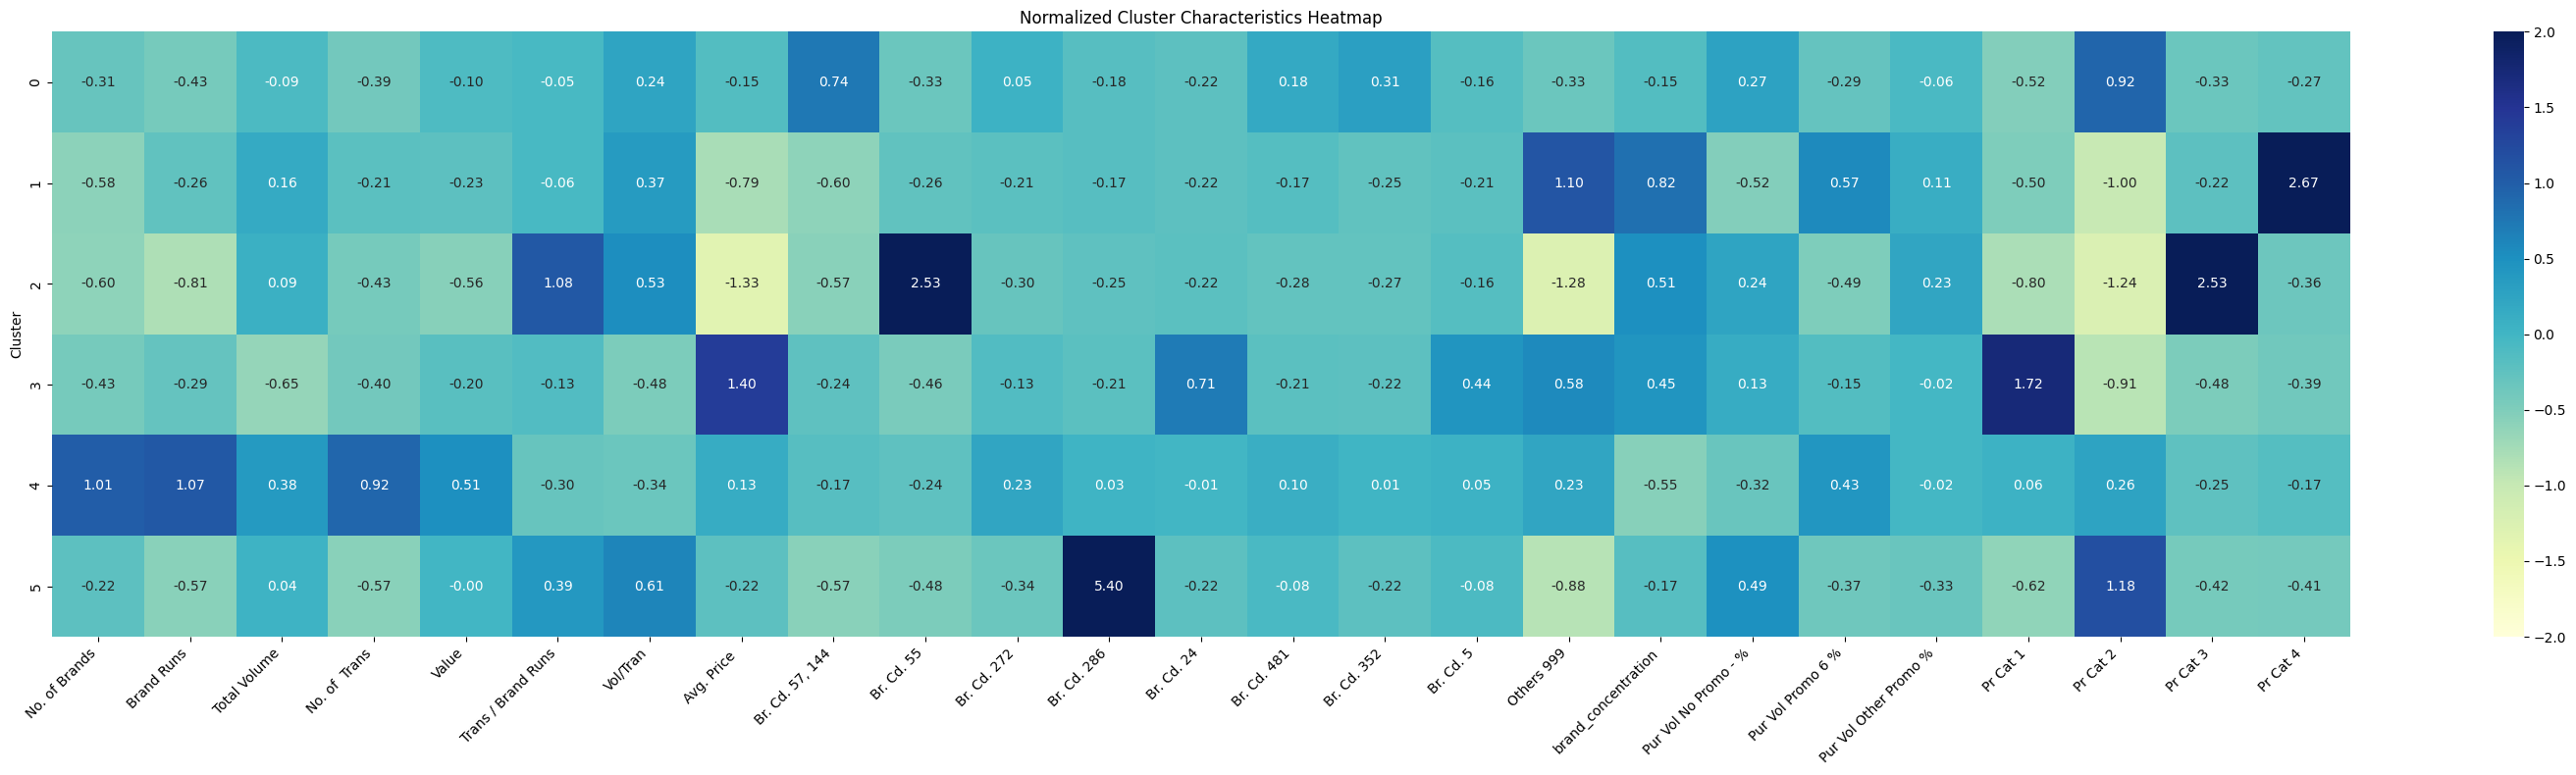


Demographic Profile of Clusters:
              SEC              FEH               MT              SEX         \
             mean median      mean median      mean median      mean median   
Cluster                                                                       
0        2.538043    3.0  2.032609    3.0  8.054348   10.0  1.755435    2.0   
1        3.285714    3.5  2.321429    3.0  9.125000   10.0  1.839286    2.0   
2        3.426471    4.0  2.044118    3.0  7.691176   10.0  1.529412    2.0   
3        1.764706    1.5  1.715686    1.5  6.892157    9.5  1.519608    2.0   
4        2.301136    2.0  2.204545    3.0  8.994318   10.0  1.886364    2.0   
5        2.214286    2.0  1.642857    1.0  7.500000   10.0  1.857143    2.0   

              AGE              EDU               HS            CHILD         \
             mean median      mean median      mean median      mean median   
Cluster                                                                       
0        3.195652

In [91]:
df, behavior_analysis, basis_analysis, combined_analysis, clf = main()

## 2.
First Set:  
0: Loyal to Brands outside scope  
1: Loyal to Brands 57,144  
2: Loyal to Brand 55  
3: Loyal to brand 286  
4: Brand Variety  

Second Set:  
0: uses Promotions code 6 or another  
1: Price cat 1  
2: Price cat 2  
3: Price Cat 3  
4: Price Cat 4  

Third Set:  
0: Loyal to brand 57, 144  
1: Price Cat 4  
2: Brand 55 and Price Cat 3  
3: Higher Avg Price and Price Cat 1  
4: Variety of Brands bought  
5: Brand 286  
